In [68]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [69]:
!pip install easyocr
!pip install imutils
!pip install opencv-python-headless==4.1.2.30
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113


In [70]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

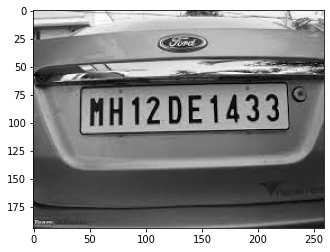

In [71]:
img=cv2.imread('/content/download.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

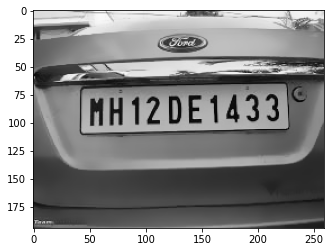

In [72]:
bfilter=cv2.bilateralFilter(gray,11,17,17)  #noise erducton
plt.imshow(cv2.cvtColor(bfilter,cv2.COLOR_BGR2RGB))

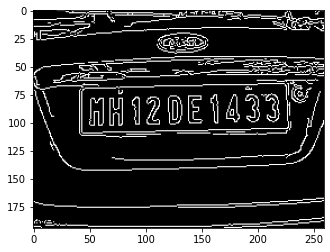

In [73]:
edged=cv2.Canny(bfilter,30,200) #edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [74]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [75]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx)==4:
    location=approx
    break     

In [76]:
location

array([[[223,  65]],

       [[ 46,  69]],

       [[ 43, 108]],

       [[228, 106]]], dtype=int32)

In [77]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

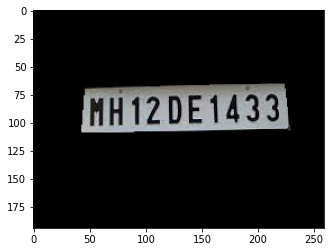

In [78]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [79]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image=gray[x1:x2+1,y1:y2+1]

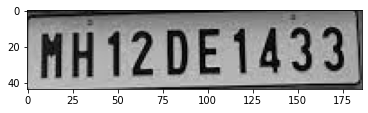

In [80]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [81]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

[([[0, 4], [183, 4], [183, 44], [0, 44]], 'MHI2 DE4433', 0.4588590738284416)]

In [82]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)

In [90]:
from geopy.geocoders import Nominatim
print(text[0],text[1])
text3="".join([text[1], text[2]])
print(text[0],text[1])
loc = Nominatim(user_agent="GetLoc")
getLoc = loc.geocode(text3)
print(getLoc.address)
print("Latitude = ", getLoc.latitude, "\n")
print("Longitude = ", getLoc.longitude)



M H
M H
Hawaii, United States
Latitude =  19.593801499999998 

Longitude =  -155.42837009716908


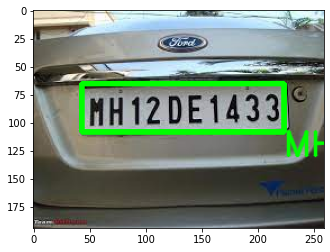

In [84]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))